## Hello,

In this notebook,
I will convert the final collection i.e., the user data:

I follow the similar steps i followed earlier and it will bring much more clarity for you:

Let's begin:

I have one table in my SQL database named as user_data_movies_m.
I will try to gather all the columns from it by making connection as mentioned below:

I will make connection with the sqlite database so that i can extract data from my database:

In [1]:
import sqlite3
import pandas as pd
import csv
import json

##### Accessing data from the project database:

In [2]:
sqlite_file ='Project_imdb.db'
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

In [11]:
rev = c.execute('Select * from user_data_movies_m')

In [12]:
rows = rev.fetchall()

In [13]:
rows

[(1,
  'Inception',
  'That Nirvana song from The Beavis and Butthead Experience',
  304,
  'Eastern Time (US & Canada)',
  "[{'screen_name': 'SaulRosenbear', 'name': 'Dr. Clitterhouse', 'id': 67030615, 'id_str': '67030615', 'indices': [0, 14]}]",
  '9.77667920649249e+17',
  '8.1748854098883e+17'),
 (2,
  'Inception',
  None,
  39,
  'Pacific Time (US & Canada)',
  "[{'screen_name': 'Thooorin', 'name': 'Thorin', 'id': 73100160, 'id_str': '73100160', 'indices': [0, 9]}]",
  '9.776678134762e+17',
  '3102358135.0'),
 (3,
  'Inception',
  "I have been gaming since the 80's. So, old-school gamer & nerd, PS4 Pro streamer, Twitch Affiliate & Mod.    Stream team: @inception_org",
  98,
  None,
  "[{'screen_name': 'LukeG01tv', 'name': 'Luke G', 'id': 564295047, 'id_str': '564295047', 'indices': [0, 10]}, {'screen_name': 'iSECXY', 'name': 'iSECX', 'id': 848610010594770944, 'id_str': '848610010594770944', 'indices': [11, 18]}, {'screen_name': 'Emberiize', 'name': 'Emberize 🔥', 'id': 2970837088, '

In [14]:
rows1 = pd.DataFrame(rows)

#### Converting the data to the csv for my reference and we can use that too to dump data:

In [16]:
rows1.to_csv("User_data_for_mongo.csv")

In [17]:
data_user = pd.read_csv("User_data_for_mongo.csv",encoding ='latin-1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
conn.close()

## Converting the data into JSON format:

In [19]:
user_records = json.loads(data_user.T.to_json()).values()

## Making connection with the MongoDb using pymongo:

In [20]:
import pymongo
conn = pymongo.MongoClient()
conn


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [21]:
from pymongo import MongoClient

In [23]:
client = MongoClient()

In [24]:
MongoClient('localhost',27017)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [25]:
db = conn.mydb

## These steps should be on tips as we have created connection so many times:

In [26]:
db =conn['ajaygoel-proj-imdb-twit']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ajaygoel-proj-imdb-twit')

In [27]:
collection = db.users

In [28]:
collection.insert(user_records)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


[ObjectId('5abd350fda9d1a0cd4b063e4'),
 ObjectId('5abd350fda9d1a0cd4b063e5'),
 ObjectId('5abd350fda9d1a0cd4b063e6'),
 ObjectId('5abd350fda9d1a0cd4b063e7'),
 ObjectId('5abd350fda9d1a0cd4b063e8'),
 ObjectId('5abd350fda9d1a0cd4b063e9'),
 ObjectId('5abd350fda9d1a0cd4b063ea'),
 ObjectId('5abd350fda9d1a0cd4b063eb'),
 ObjectId('5abd350fda9d1a0cd4b063ec'),
 ObjectId('5abd350fda9d1a0cd4b063ed'),
 ObjectId('5abd350fda9d1a0cd4b063ee'),
 ObjectId('5abd350fda9d1a0cd4b063ef'),
 ObjectId('5abd350fda9d1a0cd4b063f0'),
 ObjectId('5abd350fda9d1a0cd4b063f1'),
 ObjectId('5abd350fda9d1a0cd4b063f2'),
 ObjectId('5abd350fda9d1a0cd4b063f3'),
 ObjectId('5abd350fda9d1a0cd4b063f4'),
 ObjectId('5abd350fda9d1a0cd4b063f5'),
 ObjectId('5abd350fda9d1a0cd4b063f6'),
 ObjectId('5abd350fda9d1a0cd4b063f7'),
 ObjectId('5abd350fda9d1a0cd4b063f8'),
 ObjectId('5abd350fda9d1a0cd4b063f9'),
 ObjectId('5abd350fda9d1a0cd4b063fa'),
 ObjectId('5abd350fda9d1a0cd4b063fb'),
 ObjectId('5abd350fda9d1a0cd4b063fc'),
 ObjectId('5abd350fda9d1a

## Unsetting and removing the data from the columns:

In [29]:
collection.update_many({"tweet_user_mentions":"[]"},{"$unset":{"tweet_user_mentions":"[]"}});

In [32]:
collection.update_many({"tweet_user_description":{"$type":10}},{"$unset":{"tweet_user_description":{"$type":10}}});

In [33]:
collection.update_many({"tweet_user_time_zone":{"$type":10}},{"$unset":{"tweet_user_time_zone":{"$type":10}}});

In [48]:
like_users =[]
USERS = pd.DataFrame

### Now, I will try to find some data.

## ii) What social media users are like other social media users in your domain?

We will combine the different users on the basis of their time zone..if they are in same time zone then they are like social media users..                                                                                                   
There are unique 264 time zones in the data.. I will search for only 7 given below:                                   Eastern Time (US & Canada)
﻿Pacific Time (US & Canada)
﻿Caracas
﻿Central Time (US & Canada)
﻿Lima
﻿Atlantic Time (Canada)
﻿Brasilia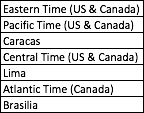                 

## Query :
db.getCollection('users').aggregate([                                                                                 
    {"$match":{"tweet_user_time_zone":
          {"$in":["Eastern Time (US & Canada)",
            "Pacific Time (US & Canada)",
            "Caracas",
            "Central Time (US & Canada)",
            "Lima",
            "Atlantic Time (Canada)",
            "Brasilia"]}
            }},
            {"$group":{
            "_id":{"movies":"$movies",
                   "tweet_user_time_zone":"$tweet_user_time_zone",
                   "tweet_user_id":"$tweet_user_id"
                  }
            }}
])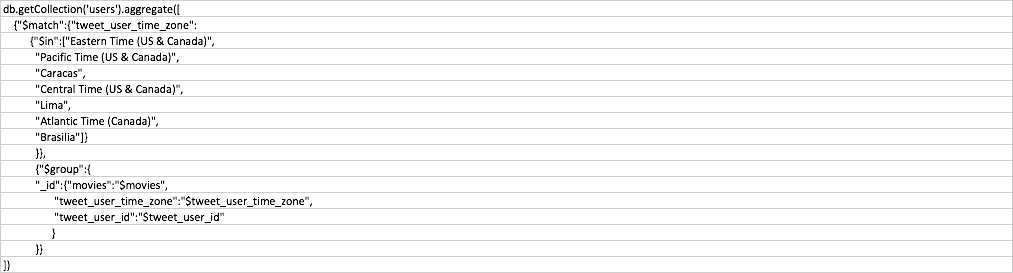


### $group, $aggregate, $match : syntax i have already discussed in the previous notebooks.

In [50]:
for a in collection.aggregate([
    {"$match":{"tweet_user_time_zone":
        {"$in":["Eastern Time (US & Canada)",
            "Pacific Time (US & Canada)",
            "Caracas",
            "Central Time (US & Canada)",
            "Lima",
            "Atlantic Time (Canada)",
            "Brasilia"]}
            }},
        {"$group":{
            "_id":{"movies":"$movies",
                "tweet_user_time_zone":"$tweet_user_time_zone",
                "tweet_user_id":"$tweet_user_id"
                }
         }},
         { "$sort": { "movies": -1 } }
]):
    like_users.append(a)
    print(a)
    

{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 206741339.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 31537871.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2365287799.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 803567264.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1736870936.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 57982473.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 26416004.0}}
{'_id': {'movies': 'Jim & Andy: The Great Beyond', 'tweet_user_time

{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 348126338.0}}
{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.61e+17}}
{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.9e+17}}
{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.23e+17}}
{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.45e+17}}
{'_id': {'movies': 'Berlin Syndrome', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 354639002.0}}
{'_id': {'movies': 'All Eyez on Me', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2795335424.0}}
{'_id': {'movies': 'All Eyez on Me', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.1e+17}}
{'_id': {'movies': 'All Eyez on Me

{'_id': {'movies': 'Suburbicon', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1126311764.0}}
{'_id': {'movies': 'Suburbicon', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 26938623.0}}
{'_id': {'movies': 'Suburbicon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.45e+17}}
{'_id': {'movies': 'Suburbicon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 234962679.0}}
{'_id': {'movies': 'Icarus', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 7.62e+17}}
{'_id': {'movies': 'Icarus', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4676315922.0}}
{'_id': {'movies': 'Icarus', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.56e+17}}
{'_id': {'movies': 'Icarus', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 570294341.0}}
{'_id': {'movies': 'Icarus', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', '

{'_id': {'movies': 'Flatliners', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3007805309.0}}
{'_id': {'movies': 'Flatliners', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 152811901.0}}
{'_id': {'movies': 'Flatliners', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 67022009.0}}
{'_id': {'movies': 'Flatliners', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 55868317.0}}
{'_id': {'movies': 'Flatliners', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 153178277.0}}
{'_id': {'movies': '1922', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 764861826.0}}
{'_id': {'movies': '1922', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3230699693.0}}
{'_id': {'movies': '1922', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3202728052.0}}
{'_id': {'movies': '1922', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2657514672.0}}
{'_id': {'movies':

{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.16e+17}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3384965067.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 14118520.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2313509265.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4011774123.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 307766311.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1140986054.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 431849946.0}}
{'_id': {'movies': 'Phan

{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 40953086.0}}
{'_id': {'movies': 'The Shape of Water', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 535050327.0}}
{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 459612537.0}}
{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 236156183.0}}
{'_id': {'movies': 'The Glass Castle', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 101315574.0}}
{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1558535040.0}}
{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Caracas', 'tweet_user_id': 110894144.0}}
{'_id': {'movies': 'Justice League', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 21985159.0}}
{'_id': {'movies': 'John Wick: Chapter

{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 389771155.0}}
{'_id': {'movies': 'Rough Night', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 443978629.0}}
{'_id': {'movies': 'The Do-Over', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1016220361.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 71192519.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 370302816.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 146721632.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2209555095.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 701789387.0}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_t

{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2559633970.0}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.22e+17}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.67e+17}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 866653477.0}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 144443358.0}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.54e+17}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 260985044.0}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 653943.0}}
{'_id': {'movies': 'Angry Birds', 'tweet_user_time_zone': 'Pacific Time (US &

{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 109023695.0}}
{'_id': {'movies': 'Sing Street', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2915066978.0}}
{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1390133912.0}}
{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3103512828.0}}
{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 77073637.0}}
{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2214945084.0}}
{'_id': {'movies': "Assassin's Creed", 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 138866819.0}}
{'_id': {'movies': 'Lion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.59e+17}}
{'_id': {'movies': 'The Void', 'tweet_user_time_zone': 'Central Time (US & Canada)', 

{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 161114942.0}}
{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.18e+17}}
{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 184671886.0}}
{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2223828644.0}}
{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3301595224.0}}
{'_id': {'movies': 'The Diary of a Teenage Girl', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 32927503.0}}
{'_id': {'movies': 'Cop Car', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 428628962.0}}
{'_id': {'movies': 'Cop Car', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', '

{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 24845524.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 56121059.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 19122894.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 3015900740.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1312155481.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 399755846.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.41e+17}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 182216437.0}}
{'_id': {'movies': 'Absolutely Anything', 'tweet_user_time_zone': 'Central

{'_id': {'movies': 'No Escape', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 49114515.0}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4026434681.0}}
{'_id': {'movies': 'Stronger', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.2e+17}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 3013285605.0}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 95680758.0}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 427698862.0}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 30957791.0}}
{'_id': {'movies': 'Eye in the Sky', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.7e+17}}
{'_id': {'movies': 'Downsizing', 'tweet_user_time_zone': 'Central Time (US & Can

{'_id': {'movies': 'The Good Dinosaur', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 587669524.0}}
{'_id': {'movies': 'Alien: Covenant', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 143256643.0}}
{'_id': {'movies': 'The Good Dinosaur', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 380076367.0}}
{'_id': {'movies': 'The Good Dinosaur', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1409006108.0}}
{'_id': {'movies': 'The Good Dinosaur', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 513369153.0}}
{'_id': {'movies': 'The Good Dinosaur', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 126794204.0}}
{'_id': {'movies': 'Burnt', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.1e+17}}
{'_id': {'movies': 'Alice Through the Looking Glass', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 591451860.0}}
{'_id': {'movie

{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 181720757.0}}
{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 287924131.0}}
{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 607519146.0}}
{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 290285389.0}}
{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.09e+17}}
{'_id': {'movies': 'The Final Girls', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2855642645.0}}
{'_id': {'movies': 'American Ultra', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 192708887.0}}
{'_id': {'movies': 'Pitch Perfect 2', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 548447852.0}}
{'_id': {'movies': 'We Are Your Friends', 'tweet_user_time_zone': 'Eastern Time (US & Canada)',

{'_id': {'movies': 'Sicario', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2340299873.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 19346335.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2468009001.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1442848915.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3105907090.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 84066761.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3052936152.0}}
{'_id': {'movies': 'Spotlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3798332354.0}}
{'_id': {'movies': 'Morgan', 'tweet_user_time_zone': 'Eastern Time

{'_id': {'movies': 'Muppets Most Wanted', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 17111359.0}}
{'_id': {'movies': 'Muppets Most Wanted', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 243263010.0}}
{'_id': {'movies': 'Muppets Most Wanted', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 617767344.0}}
{'_id': {'movies': 'The Walk', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2465505958.0}}
{'_id': {'movies': 'White Bird in a Blizzard', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2172922045.0}}
{'_id': {'movies': 'Muppets Most Wanted', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1528104188.0}}
{'_id': {'movies': '10 Cloverfield Lane', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 473503948.0}}
{'_id': {'movies': 'Hardcore Henry', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1477609

{'_id': {'movies': 'The Boxtrolls', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 28119571.0}}
{'_id': {'movies': 'Seventh Son', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1898274198.0}}
{'_id': {'movies': 'The Boxtrolls', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 158181329.0}}
{'_id': {'movies': 'The Boxtrolls', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2293702056.0}}
{'_id': {'movies': 'Southpaw', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1293445945.0}}
{'_id': {'movies': 'Megamind', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4821367699.0}}
{'_id': {'movies': 'Automata', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2980392701.0}}
{'_id': {'movies': 'Automata', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2374492681.0}}
{'_id': {'movies': 'Burlesque', 'tweet_user_time_zone': 'Atlantic T

{'_id': {'movies': 'American Assassin', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.95e+17}}
{'_id': {'movies': 'Personal Shopper', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 21628484.0}}
{'_id': {'movies': 'Pompeii', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.14e+17}}
{'_id': {'movies': 'xXx: Return of Xander Cage', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 73967467.0}}
{'_id': {'movies': 'Godzilla', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 363911516.0}}
{'_id': {'movies': 'Pompeii', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.11e+17}}
{'_id': {'movies': 'I Give It a Year', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 7.03e+17}}
{'_id': {'movies': 'Pompeii', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 17666104.0}}
{'_id': {'movies': 'Silver Linings Playbook', 'twee

{'_id': {'movies': 'Relatos salvajes', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.24e+17}}
{'_id': {'movies': 'Rubber', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 460475553.0}}
{'_id': {'movies': 'Relatos salvajes', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 178434356.0}}
{'_id': {'movies': 'Relatos salvajes', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.3e+17}}
{'_id': {'movies': 'Sin City: A Dame to Kill For', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 1018025802.0}}
{'_id': {'movies': 'Sin City: A Dame to Kill For', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 1470147476.0}}
{'_id': {'movies': 'Magic Mike', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 300018587.0}}
{'_id': {'movies': 'The Awakening', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2797963749.0}}
{'_id': {'movies': 'Sin City: A Dame to Kil

{'_id': {'movies': 'Non-Stop', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 45616558.0}}
{'_id': {'movies': 'Non-Stop', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.24e+17}}
{'_id': {'movies': 'Non-Stop', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.87e+17}}
{'_id': {'movies': 'The Grey', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 1494121200.0}}
{'_id': {'movies': 'Non-Stop', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 118764942.0}}
{'_id': {'movies': 'Nerve', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 16870688.0}}
{'_id': {'movies': 'A Man Called Ove', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2831099252.0}}
{'_id': {'movies': 'A Separation', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 236442747.0}}
{'_id': {'movies': 'Non-Stop', 'tweet_user_time_zone': 'Eastern Time 

{'_id': {'movies': 'Big Hero 6', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 379808224.0}}
{'_id': {'movies': 'The Light Between Oceans', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 22992537.0}}
{'_id': {'movies': 'Nightcrawler', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 17257224.0}}
{'_id': {'movies': 'The Hunger Games: Mockingjay - Part 1', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 4699154840.0}}
{'_id': {'movies': 'The Hunger Games: Mockingjay - Part 1', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 3304461730.0}}
{'_id': {'movies': 'The Hunger Games: Mockingjay - Part 1', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.98e+17}}
{'_id': {'movies': 'The Hunger Games: Mockingjay - Part 1', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2559886867.0}}
{'_id': {'movies': 'The Hunger Games: Mockingjay - Part 1', 'tweet_use

{'_id': {'movies': 'Bachelorette', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 780208176.0}}
{'_id': {'movies': 'The Hobbit: The Battle of the Five Armies', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 885360620.0}}
{'_id': {'movies': 'The Last Days on Mars', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 256089358.0}}
{'_id': {'movies': 'The Hobbit: The Battle of the Five Armies', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 31197262.0}}
{'_id': {'movies': 'The Age of Adaline', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.56e+17}}
{'_id': {'movies': 'The Hobbit: The Battle of the Five Armies', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1606382065.0}}
{'_id': {'movies': 'The Hobbit: The Battle of the Five Armies', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 21935934.0}}
{'_id': {'movies': 'Birdman or (T

{'_id': {'movies': 'Alice Through the Looking Glass', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.85e+17}}
{'_id': {'movies': 'Hell or High Water', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.7e+17}}
{'_id': {'movies': 'The Imposter', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 1041297906.0}}
{'_id': {'movies': 'A Most Wanted Man', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 220706575.0}}
{'_id': {'movies': 'Guardians of the Galaxy', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 626205514.0}}
{'_id': {'movies': 'Room 237', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.86e+17}}
{'_id': {'movies': 'Interstellar', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 350346078.0}}
{'_id': {'movies': 'The November Man', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 309258699.0}}
{'_id': {'mo

{'_id': {'movies': 'Rise of the Planet of the Apes', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 20696181.0}}
{'_id': {'movies': 'Charlie Countryman', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 276274631.0}}
{'_id': {'movies': 'Charlie Countryman', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 44789126.0}}
{'_id': {'movies': 'Inferno', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4719525981.0}}
{'_id': {'movies': 'Carol', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3044679191.0}}
{'_id': {'movies': 'Charlie Countryman', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2936500158.0}}
{'_id': {'movies': 'Open Grave', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1464923628.0}}
{'_id': {'movies': 'The Zero Theorem', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.99e+17}}
{'_id': {'movie

{'_id': {'movies': 'Guardians of the Galaxy', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 707768660.0}}
{'_id': {'movies': 'The Machine', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3232879200.0}}
{'_id': {'movies': 'The Machine', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 216591442.0}}
{'_id': {'movies': 'The Machine', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 158950134.0}}
{'_id': {'movies': 'The Machine', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 41556034.0}}
{'_id': {'movies': 'Moonlight', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3158357438.0}}
{'_id': {'movies': 'The Equalizer', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 556430596.0}}
{'_id': {'movies': 'The Machine', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 961919545.0}}
{'_id': {'movies': 'Your Highness',

{'_id': {'movies': 'Blue Ruin', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1607269520.0}}
{'_id': {'movies': 'Rio 2', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 45979400.0}}
{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 2455564314.0}}
{'_id': {'movies': 'Blue Ruin', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 96414747.0}}
{'_id': {'movies': 'Blue Ruin', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.3e+17}}
{'_id': {'movies': 'Blue Ruin', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 191353878.0}}
{'_id': {'movies': 'Jonah Hex', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 3381777364.0}}
{'_id': {'movies': 'Kaze tachinu', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3153769731.0}}
{'_id': {'movies': 'Our Brand Is Crisis', 'tweet_user_time_zone': 'Pacific Time (US & Can

{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 854139786.0}}
{'_id': {'movies': 'The Big Wedding', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 21224881.0}}
{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1601812022.0}}
{'_id': {'movies': 'The Dark Knight Rises', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 614581229.0}}
{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 735545977.0}}
{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3585813132.0}}
{'_id': {'movies': 'Turbo', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.02e+17}}
{'_id': {'movies': 'The Counselor', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 175080231.0}}
{'_id': {'movies': 'The Counselor', 

{'_id': {'movies': 'Eddie the Eagle', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 611337173.0}}
{'_id': {'movies': 'The Raid: Redemption', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 446362905.0}}
{'_id': {'movies': 'X-Men: Days of Future Past', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2568364783.0}}
{'_id': {'movies': 'Water for Elephants', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 179975366.0}}
{'_id': {'movies': 'The Book Thief', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1387372712.0}}
{'_id': {'movies': 'Life of Pi', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1112644122.0}}
{'_id': {'movies': 'The Book Thief', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 43835413.0}}
{'_id': {'movies': 'Under the Skin', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3499731553.0}}
{

{'_id': {'movies': 'Pompeii', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2409571994.0}}
{'_id': {'movies': 'Ouija: Origin of Evil', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 22050989.0}}
{'_id': {'movies': 'White House Down', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 447785047.0}}
{'_id': {'movies': 'Endless Love', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.1e+17}}
{'_id': {'movies': 'Whiplash', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 106498720.0}}
{'_id': {'movies': 'White House Down', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 8.01e+17}}
{'_id': {'movies': 'Anthropoid', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 265363639.0}}
{'_id': {'movies': 'Home', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1598888748.0}}
{'_id': {'movies': 'White House Down', 'tweet_user_t

{'_id': {'movies': 'Oblivion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1877005404.0}}
{'_id': {'movies': 'MI-5', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.19e+17}}
{'_id': {'movies': 'Oblivion', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 634704431.0}}
{'_id': {'movies': 'Hector and the Search for Happiness', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2671521413.0}}
{'_id': {'movies': 'Star Trek: Into Darkness', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.09e+17}}
{'_id': {'movies': 'Star Trek: Into Darkness', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 41666975.0}}
{'_id': {'movies': 'Star Trek: Into Darkness', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 54666674.0}}
{'_id': {'movies': 'Star Trek: Into Darkness', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.77e

{'_id': {'movies': 'Rubber', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 531953084.0}}
{'_id': {'movies': 'Mr. Peabody & Sherman', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 72195415.0}}
{'_id': {'movies': 'Identity Thief', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 27488836.0}}
{'_id': {'movies': 'St. Vincent', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 94476820.0}}
{'_id': {'movies': 'The Wolf of Wall Street', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 731378041.0}}
{'_id': {'movies': 'Gold', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 160272131.0}}
{'_id': {'movies': 'The Wolf of Wall Street', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 66007088.0}}
{'_id': {'movies': 'The Wolf of Wall Street', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 584298474.0}}
{'_id': {'movies': 'My 

{'_id': {'movies': 'Into the Woods', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 24497797.0}}
{'_id': {'movies': 'Cinderella', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 25069675.0}}
{'_id': {'movies': 'The Hunter', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 42912156.0}}
{'_id': {'movies': 'Indie Game: The Movie', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.38e+17}}
{'_id': {'movies': 'Wild', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 3021519260.0}}
{'_id': {'movies': 'Kill List', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 570896620.0}}
{'_id': {'movies': 'American Mary', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.43e+17}}
{'_id': {'movies': 'Tooth Fairy', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3299923430.0}}
{'_id': {'movies': 'Life of Pi', 'tweet_user_time_z

{'_id': {'movies': 'The 5th Wave', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 17000648.0}}
{'_id': {'movies': 'Transformers: Dark of the Moon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.41e+17}}
{'_id': {'movies': 'Maniac', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3306403686.0}}
{'_id': {'movies': 'The Boss Baby', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 460819242.0}}
{'_id': {'movies': 'Charlie Countryman', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 21068103.0}}
{'_id': {'movies': 'Murder on the Orient Express', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 3353508148.0}}
{'_id': {'movies': 'Maniac', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 349117735.0}}
{'_id': {'movies': 'The Wolverine', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.84e+17}}
{'_id': {'movies

{'_id': {'movies': 'Inside Llewyn Davis', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 4718553161.0}}
{'_id': {'movies': 'Unfinished Business', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 375222367.0}}
{'_id': {'movies': 'Step Up 3D', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 811052186.0}}
{'_id': {'movies': 'The Awakening', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2812262455.0}}
{'_id': {'movies': 'The Collection', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 134101507.0}}
{'_id': {'movies': 'Star Trek: Beyond', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 660103.0}}
{'_id': {'movies': 'The Collection', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 75343553.0}}
{'_id': {'movies': 'The Collection', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 413241404.0}}
{'_id': {'movies':

{'_id': {'movies': 'Red Dawn', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 116136264.0}}
{'_id': {'movies': '20th Century Women', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2694395460.0}}
{'_id': {'movies': 'Red Dawn', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 386488741.0}}
{'_id': {'movies': 'Red Dawn', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2402871253.0}}
{'_id': {'movies': 'Fathers & Daughters', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 415448890.0}}
{'_id': {'movies': 'The Fighter', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 101053362.0}}
{'_id': {'movies': 'Red Dawn', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 19635583.0}}
{'_id': {'movies': 'Blue Jasmine', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2493061931.0}}
{'_id': {'movies': 'Suicide Squad', 'tweet_user_time_zone': 

{'_id': {'movies': 'Thanks for Sharing', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 20189287.0}}
{'_id': {'movies': 'Ip Man 2', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.67e+17}}
{'_id': {'movies': 'The Smurfs', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 710998418.0}}
{'_id': {'movies': 'Premium Rush', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2989065412.0}}
{'_id': {'movies': 'Last Night', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 28146938.0}}
{'_id': {'movies': 'Seven Psychopaths', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2171618857.0}}
{'_id': {'movies': 'Phantom Thread', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 25857013.0}}
{'_id': {'movies': 'Premium Rush', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 125187484.0}}
{'_id': {'movies': 'The Hunger Games', 

{'_id': {'movies': 'Hotel Transylvania', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4658929515.0}}
{'_id': {'movies': 'Hotel Transylvania', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 30238338.0}}
{'_id': {'movies': 'Oz the Great and Powerful', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.19e+17}}
{'_id': {'movies': 'End of Watch', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1486744616.0}}
{'_id': {'movies': 'Selma', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 26028364.0}}
{'_id': {'movies': 'Bachelorette', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.36e+17}}
{'_id': {'movies': 'End of Watch', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8e+17}}
{'_id': {'movies': 'Man Up', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2990482363.0}}
{'_id': {'movies': 'End of Watch', 'tweet_user_time_zone'

{'_id': {'movies': '10 Cloverfield Lane', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 299138851.0}}
{'_id': {'movies': 'The Purge', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 272219174.0}}
{'_id': {'movies': 'The Avengers', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 313385673.0}}
{'_id': {'movies': 'The Shape of Water', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 109077070.0}}
{'_id': {'movies': '127 Hours', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1911976680.0}}
{'_id': {'movies': 'Jack Reacher', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2249342029.0}}
{'_id': {'movies': 'The Theory of Everything', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 158159067.0}}
{'_id': {'movies': 'Krampus', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 122987022.0}}
{'_id': {'movies': 'Big Hero 6', 'tweet_us

{'_id': {'movies': 'The Great Gatsby', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 2400268952.0}}
{'_id': {'movies': 'Never Let Me Go', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2918964411.0}}
{'_id': {'movies': 'Diary of a Wimpy Kid: Rodrick Rules', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 622365030.0}}
{'_id': {'movies': 'Goon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.89e+17}}
{'_id': {'movies': 'Diary of a Wimpy Kid: Rodrick Rules', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 2346762807.0}}
{'_id': {'movies': 'Diary of a Wimpy Kid: Rodrick Rules', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.68e+17}}
{'_id': {'movies': 'Man on a Ledge', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 711486312.0}}
{'_id': {'movies': 'Man of Tai Chi', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2442703

{'_id': {'movies': 'Trollhunter', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2867800264.0}}
{'_id': {'movies': 'Straw Dogs', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 224496099.0}}
{'_id': {'movies': 'The Purge', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 580252446.0}}
{'_id': {'movies': 'Straw Dogs', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 7.34e+17}}
{'_id': {'movies': "Legend of the Guardians: The Owls of Ga'Hoole", 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 2455958087.0}}
{'_id': {'movies': 'Straw Dogs', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 198736325.0}}
{'_id': {'movies': 'Brave', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4560563554.0}}
{'_id': {'movies': 'Lincoln', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 342864274.0}}
{'_id': {'movies': 'Straw Dogs', 'tweet_user_ti

{'_id': {'movies': 'What If', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3226282347.0}}
{'_id': {'movies': 'Stake Land', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 21948237.0}}
{'_id': {'movies': 'Martha Marcy May Marlene', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 348174495.0}}
{'_id': {'movies': 'The Florida Project', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1220152302.0}}
{'_id': {'movies': 'Steve Jobs', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3253692772.0}}
{'_id': {'movies': 'The Wolf of Wall Street', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 56041531.0}}
{'_id': {'movies': 'Martha Marcy May Marlene', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 157221077.0}}
{'_id': {'movies': 'Martha Marcy May Marlene', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.77e+17

{'_id': {'movies': 'The Call', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1703271594.0}}
{'_id': {'movies': 'Machine Gun Preacher', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 1325846736.0}}
{'_id': {'movies': 'Prometheus', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 7624112.0}}
{'_id': {'movies': 'Machine Gun Preacher', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.72e+17}}
{'_id': {'movies': 'Machine Gun Preacher', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 53095537.0}}
{'_id': {'movies': 'The House', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 34605070.0}}
{'_id': {'movies': 'Something Borrowed', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1053710773.0}}
{'_id': {'movies': 'Dunkirk', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.23e+17}}
{'_id': {'movies': 'In a Better World', 'tweet_user_t

{'_id': {'movies': 'The Call', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2215948938.0}}
{'_id': {'movies': 'Hotel Transylvania 2', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 115997530.0}}
{'_id': {'movies': "The Sorcerer's Apprentice", 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.43e+17}}
{'_id': {'movies': 'Take Shelter', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1113085848.0}}
{'_id': {'movies': 'Drive Angry', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3183379785.0}}
{'_id': {'movies': 'The Campaign', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.92e+17}}
{'_id': {'movies': 'Take Shelter', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 552916648.0}}
{'_id': {'movies': 'Sherlock Holmes: A Game of Shadows', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 199758418.0}}
{'_id

{'_id': {'movies': 'The Three Musketeers', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2804104219.0}}
{'_id': {'movies': 'Captain Fantastic', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 228588717.0}}
{'_id': {'movies': 'The Three Musketeers', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 95437756.0}}
{'_id': {'movies': 'The Emoji Movie', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.46e+17}}
{'_id': {'movies': 'Blair Witch', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.43e+17}}
{'_id': {'movies': 'Mistress America', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 141828106.0}}
{'_id': {'movies': 'Automata', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2838048029.0}}
{'_id': {'movies': 'The Invitation', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 245503109.0}}
{'_id': {'movies': '

{'_id': {'movies': 'Irrational Man', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 19560905.0}}
{'_id': {'movies': 'War Horse', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.7e+17}}
{'_id': {'movies': 'War Horse', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2910206878.0}}
{'_id': {'movies': 'Transformers: Dark of the Moon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 552830249.0}}
{'_id': {'movies': 'This Must Be the Place', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2341948750.0}}
{'_id': {'movies': 'War Horse', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 23004730.0}}
{'_id': {'movies': 'Blue Valentine', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2220419471.0}}
{'_id': {'movies': 'War Horse', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 29190303.0}}
{'_id': {'movies': 'Safe

{'_id': {'movies': 'The Lucky One', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 7.54e+17}}
{'_id': {'movies': 'Safety Not Guaranteed', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 34119950.0}}
{'_id': {'movies': 'Contagion', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 16268712.0}}
{'_id': {'movies': 'Indie Game: The Movie', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3430788867.0}}
{'_id': {'movies': 'Contagion', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 9.26e+17}}
{'_id': {'movies': 'Her', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 258556878.0}}
{'_id': {'movies': 'A Bad Moms Christmas', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1734235369.0}}
{'_id': {'movies': 'The Woman in Black', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 125229073.0}}
{'_id': {'movies': 'Avengers

{'_id': {'movies': 'Hugo', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2747700371.0}}
{'_id': {'movies': 'The 100 Year-Old Man Who Climbed Out the Window and Disappeared', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 78706908.0}}
{'_id': {'movies': 'Cyrus', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 152746992.0}}
{'_id': {'movies': 'How to Train Your Dragon', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1187828928.0}}
{'_id': {'movies': 'Love & Other Drugs', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.14e+17}}
{'_id': {'movies': 'Hugo', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2806380665.0}}
{'_id': {'movies': 'Morgan', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 24408664.0}}
{'_id': {'movies': 'Melancholia', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 1089509023.0}}
{'_id': {'movies': 'Florence Foster Je

{'_id': {'movies': 'Super 8', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3108044844.0}}
{'_id': {'movies': 'Super 8', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.95e+17}}
{'_id': {'movies': 'You Again', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2156000407.0}}
{'_id': {'movies': 'Moneyball', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 50660748.0}}
{'_id': {'movies': 'The Next Three Days', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 24535680.0}}
{'_id': {'movies': 'Hit and Run', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 379570872.0}}
{'_id': {'movies': 'Rubber', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.09e+17}}
{'_id': {'movies': 'The Whistleblower', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.41e+17}}
{'_id': {'movies': 'Moneyball', 'tweet_user_time_zone': 'Eas

{'_id': {'movies': 'Black Swan', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 3004227593.0}}
{'_id': {'movies': 'Deadpool', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 621232301.0}}
{'_id': {'movies': 'The Sitter', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 3234099793.0}}
{'_id': {'movies': 'The Expendables', 'tweet_user_time_zone': 'Caracas', 'tweet_user_id': 73237187.0}}
{'_id': {'movies': 'Mission: Impossible - Ghost Protocol', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2530336184.0}}
{'_id': {'movies': 'How to Train Your Dragon', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 294981115.0}}
{'_id': {'movies': 'Ra.One', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 877181312.0}}
{'_id': {'movies': 'Swiss Army Man', 'tweet_user_time_zone': 'Caracas', 'tweet_user_id': 28854382.0}}
{'_id': {'movies': 'Bone Tomahawk', 'tweet_user_time_z

{'_id': {'movies': 'Logan', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.45e+17}}
{'_id': {'movies': 'The Adventures of Tintin', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 743944464.0}}
{'_id': {'movies': "I'm Still Here", 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 68167603.0}}
{'_id': {'movies': 'Masterminds', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 553069364.0}}
{'_id': {'movies': 'Life as We Know It', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 119667870.0}}
{'_id': {'movies': 'Drive', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 422181027.0}}
{'_id': {'movies': "I'm Still Here", 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.6e+17}}
{'_id': {'movies': 'The Crazies', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 42971462.0}}
{'_id': {'movies': 'Sanctum', 'tweet_user_t

{'_id': {'movies': "The World's End", 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 180831284.0}}
{'_id': {'movies': 'Despicable Me', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 449820833.0}}
{'_id': {'movies': 'Happythankyoumoreplease', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 181892320.0}}
{'_id': {'movies': 'Repo Men', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 18182938.0}}
{'_id': {'movies': 'Exit Through the Gift Shop', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 274650560.0}}
{'_id': {'movies': 'After Earth', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 594239617.0}}
{'_id': {'movies': 'Suffragette', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 391171317.0}}
{'_id': {'movies': 'This Is the End', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 86537404.0}}
{'_id': {'movies

{'_id': {'movies': 'Green Lantern', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 84519366.0}}
{'_id': {'movies': 'Kill the Irishman', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 894725000.0}}
{'_id': {'movies': 'The Amazing Spider-Man 2', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.96e+17}}
{'_id': {'movies': 'Stone', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2328737088.0}}
{'_id': {'movies': 'The Beaver', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 2973943643.0}}
{'_id': {'movies': 'Maniac', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.88e+17}}
{'_id': {'movies': 'The Finest Hours', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 980865674.0}}
{'_id': {'movies': 'Real Steel', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3437722523.0}}
{'_id': {'movies': 'Knight and Day', 't

{'_id': {'movies': 'Fair Game', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.16e+17}}
{'_id': {'movies': "We're the Millers", 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 52820271.0}}
{'_id': {'movies': 'Paul', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 334358787.0}}
{'_id': {'movies': 'Fair Game', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 270730640.0}}
{'_id': {'movies': 'Green Lantern', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 768736903.0}}
{'_id': {'movies': 'Hot Pursuit', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 16250915.0}}
{'_id': {'movies': 'The Maze Runner', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.57e+17}}
{'_id': {'movies': 'Ah-ga-ssi', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.82e+17}}
{'_id': {'movies': 'American Ultra', 'tweet_user_time_zone': 'Ce

{'_id': {'movies': 'War for the Planet of the Apes', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 768736903.0}}
{'_id': {'movies': 'When in Rome', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 278092899.0}}
{'_id': {'movies': 'Inferno', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 354976812.0}}
{'_id': {'movies': 'Robot & Frank', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 1164337946.0}}
{'_id': {'movies': 'The Losers', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 8.05e+17}}
{'_id': {'movies': 'Trespass', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 249115282.0}}
{'_id': {'movies': 'Neighbors', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 2201521351.0}}
{'_id': {'movies': 'The Girl with All the Gifts', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 473483551.0}}
{'_id': {'movies': 'Stone

{'_id': {'movies': 'Another Earth', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1647406700.0}}
{'_id': {'movies': "Gulliver's Travels", 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 16317608.0}}
{'_id': {'movies': 'American Reunion', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 47019539.0}}
{'_id': {'movies': 'It Follows', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 1432816070.0}}
{'_id': {'movies': 'Devil', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 1473233258.0}}
{'_id': {'movies': 'Like Crazy', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 410960563.0}}
{'_id': {'movies': 'Dinner for Schmucks', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 67512827.0}}
{'_id': {'movies': 'Thor', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 27423650.0}}
{'_id': {'movies': 'Ferdinand', 'tweet_use

{'_id': {'movies': 'Kong: Skull Island', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 92603118.0}}
{'_id': {'movies': 'The Grandmaster', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 797706956.0}}
{'_id': {'movies': 'The Other Guys', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 23931804.0}}
{'_id': {'movies': 'High-Rise', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 15960672.0}}
{'_id': {'movies': 'Journey 2: The Mysterious Island', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 4797816434.0}}
{'_id': {'movies': 'Kubo and the Two Strings', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 407103626.0}}
{'_id': {'movies': 'The Mechanic', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 1370905722.0}}
{'_id': {'movies': 'Hacksaw Ridge', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.24e+17}}
{'_

{'_id': {'movies': 'Scott Pilgrim vs. the World', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 130407331.0}}
{'_id': {'movies': 'Machete', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 41479204.0}}
{'_id': {'movies': 'Eat Pray Love', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 313052272.0}}
{'_id': {'movies': 'Home', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.17e+17}}
{'_id': {'movies': 'The Best of Me', 'tweet_user_time_zone': 'Brasilia', 'tweet_user_id': 55659774.0}}
{'_id': {'movies': 'Alex Cross', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 14518761.0}}
{'_id': {'movies': 'Scott Pilgrim vs. the World', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.55e+17}}
{'_id': {'movies': 'The Monuments Men', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 836235973.0}}
{'_id': {'movies': 'Cyrus', 'tweet_user_time

{'_id': {'movies': 'The DUFF', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 16371529.0}}
{'_id': {'movies': 'Dinner for Schmucks', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 322912997.0}}
{'_id': {'movies': 'Scary Movie 5', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 2937536105.0}}
{'_id': {'movies': 'The Killer Inside Me', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 41964511.0}}
{'_id': {'movies': 'The Debt', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 16346615.0}}
{'_id': {'movies': 'The Jungle Book', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 631163409.0}}
{'_id': {'movies': 'The Best Exotic Marigold Hotel', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 20609969.0}}
{'_id': {'movies': 'Exit Through the Gift Shop', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 344442266.0}}
{'_id': 

{'_id': {'movies': 'The Great Gatsby', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 9.03e+17}}
{'_id': {'movies': 'Chronicle', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 3176942361.0}}
{'_id': {'movies': 'Killing Them Softly', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 108768860.0}}
{'_id': {'movies': 'The Accountant', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.77e+17}}
{'_id': {'movies': 'Sex Tape', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 42433492.0}}
{'_id': {'movies': 'How to Train Your Dragon', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.09e+17}}
{'_id': {'movies': 'Bastille Day', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 325419757.0}}
{'_id': {'movies': 'Heartbeats', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 7.08e+17}}
{'_id': {'movies': 'Jack and Jill', 

{'_id': {'movies': 'Sing Street', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3433524562.0}}
{'_id': {'movies': 'Machete', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 50441526.0}}
{'_id': {'movies': 'The Ghost Writer', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 24896025.0}}
{'_id': {'movies': 'Alice in Wonderland', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 844690092.0}}
{'_id': {'movies': 'Rubber', 'tweet_user_time_zone': 'Atlantic Time (Canada)', 'tweet_user_id': 622002164.0}}
{'_id': {'movies': 'Would You Rather', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 58593934.0}}
{'_id': {'movies': 'Dark Places', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.74e+17}}
{'_id': {'movies': 'Scott Pilgrim vs. the World', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 1268437807.0}}
{'_id': {'movies': 'Killing Sea

{'_id': {'movies': "That's My Boy", 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 8.79e+17}}
{'_id': {'movies': 'The Man from U.N.C.L.E.', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 3184456046.0}}
{'_id': {'movies': 'Margin Call', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 71026317.0}}
{'_id': {'movies': 'Predators', 'tweet_user_time_zone': 'Central Time (US & Canada)', 'tweet_user_id': 396918661.0}}
{'_id': {'movies': 'Beautiful Creatures', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 402135465.0}}
{'_id': {'movies': 'Contagion', 'tweet_user_time_zone': 'Eastern Time (US & Canada)', 'tweet_user_id': 9.53e+17}}
{'_id': {'movies': 'Mike and Dave Need Wedding Dates', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 306759151.0}}
{'_id': {'movies': 'Wall Street: Money Never Sleeps', 'tweet_user_time_zone': 'Pacific Time (US & Canada)', 'tweet_user_id': 340447693

In [63]:
Like_users1= pd.DataFrame(like_users)

In [78]:
like_users[9999]

{'_id': {'movies': 'The Wolfman',
  'tweet_user_id': 2562118142.0,
  'tweet_user_time_zone': 'Pacific Time (US & Canada)'}}

In [58]:
like_users[0]['_id']['movies']

'Jim & Andy: The Great Beyond'

In [67]:
like_users[0]['_id']['tweet_user_id']

206741339.0

In [61]:
like_users[0]['_id']['tweet_user_time_zone']

'Central Time (US & Canada)'

In [77]:
Like_users1.size

41049

## I will answer more complicated questions in the next part of the MongoDb project.
It will answer your most of the questions, if not, you can mail me on goel.aj@husky.neu.edu.

I will get back to you as soon as possible.

It was nice doing work with you..!!